In [70]:
%matplotlib inline

#Dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd

In [2]:
#point to csvs
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

#load csvs
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [3]:
#inspect cities
sum(city_data_df["type"]=="Rural")

18

In [4]:
#inspect rides

ride_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     2375 non-null   object 
 1   date     2375 non-null   object 
 2   fare     2375 non-null   float64
 3   ride_id  2375 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 74.3+ KB


In [5]:
# merge the dfs

pyber_data_df = pd.merge(ride_data_df,city_data_df,on=["city","city"], how = "left")

pyber_data_df.head(10)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437,10,Urban
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091,44,Urban
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754,21,Urban
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694,4,Urban
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789,33,Urban


In [6]:
#setting up 3 dfs, one for each city type

urban_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
rural_df = pyber_data_df[pyber_data_df["type"] == "Rural"]
suburban_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]

rural_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [7]:
#calculating rides in each city

urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_df.groupby(["city"]).count()["ride_id"]

urban_ride_count.head()

city
Amandaburgh        18
Barajasview        22
Carriemouth        27
Christopherfurt    27
Deanville          19
Name: ride_id, dtype: int64

In [8]:
#calculating avg fare in each city

urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]
suburban_avg_fare = suburban_df.groupby(["city"]).mean()["fare"]

urban_avg_fare.head()

city
Amandaburgh        24.641667
Barajasview        25.332273
Carriemouth        28.314444
Christopherfurt    24.501852
Deanville          25.842632
Name: fare, dtype: float64

In [9]:
#calculating avg number of drivers in each city

urban_driver_count = urban_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_df.groupby(["city"]).mean()["driver_count"]
suburban_driver_count = suburban_df.groupby(["city"]).mean()["driver_count"]

urban_driver_count.head()

city
Amandaburgh        12.0
Barajasview        26.0
Carriemouth        52.0
Christopherfurt    41.0
Deanville          49.0
Name: driver_count, dtype: float64

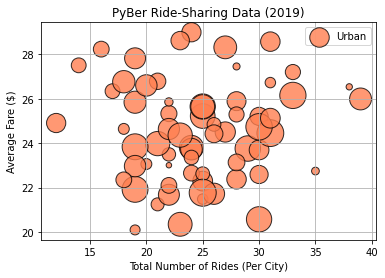

In [10]:
#making urban scatter plot

plt.scatter(urban_ride_count,urban_avg_fare, s = [num*10 for num in urban_driver_count], 
            edgecolor = "k", linewidth=1, color = "coral", alpha = .8, label = "Urban")
plt.legend()

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)


plt.show()

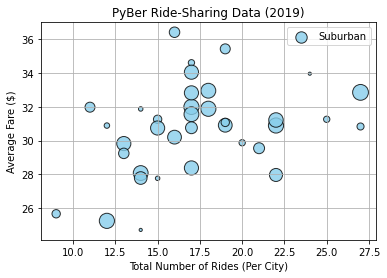

In [11]:
#making suburban scatter plot

plt.scatter(suburban_ride_count,suburban_avg_fare, s = [num*10 for num in suburban_driver_count], 
            edgecolor = "k", linewidth=1, color = "skyblue", alpha = .8, label = "Suburban")
plt.legend()

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)


plt.show()

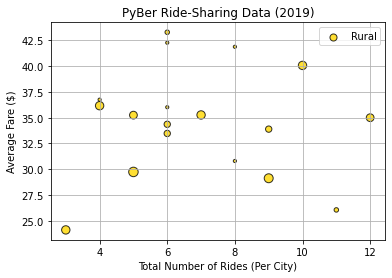

In [12]:
#making rural scatter plot

plt.scatter(rural_ride_count,rural_avg_fare, s = [num*10 for num in rural_driver_count], 
            edgecolor = "k", linewidth=1, color = "gold", alpha = .8, label = "Rural")
plt.legend()

plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)


plt.show()

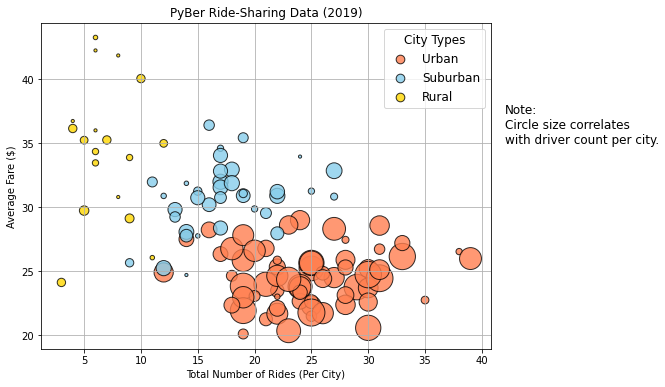

In [13]:
#create the combined chart and adjust right side for note
plt.subplots(figsize=(10, 6))
plt.subplots_adjust(right=0.75)

#add three scatters
plt.scatter(urban_ride_count,urban_avg_fare, s = [num*10 for num in urban_driver_count], 
            edgecolor = "k", linewidth=1, color = "coral", alpha = .8, label = "Urban")

plt.scatter(suburban_ride_count,suburban_avg_fare, s = [num*10 for num in suburban_driver_count], 
            edgecolor = "k", linewidth=1, color = "skyblue", alpha = .8, label = "Suburban")

plt.scatter(rural_ride_count,rural_avg_fare, s = [num*10 for num in rural_driver_count], 
            edgecolor = "k", linewidth=1, color = "gold", alpha = .8, label = "Rural")

#set up legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
                 scatterpoints=1, loc = "best",
                 title = "City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

#labels and titles
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.grid(True)

#note
plt.text(42,35,"Note:\nCircle size correlates\nwith driver count per city.", fontsize = "12")


plt.savefig("analysis/Fig1.png", transparent = False, facecolor = "white")


In [14]:
suburban_ride_count.mode()

0    17
dtype: int64

In [15]:
import scipy.stats as sts

print(sts.mode(rural_ride_count)[0])

[6]


In [16]:
#building fare series

urban_fares = urban_df["fare"]
rural_fares = rural_df["fare"]
suburban_fares = suburban_df["fare"]


In [17]:
fare_dict = {"urban trips":urban_fares,
             "rural trips":rural_fares,
             "suburban trips":suburban_fares}

for key, value in fare_dict.items():
    print(f"The mean for {key} is ${value.mean():.2f}")
    print(f"The median for {key} is ${value.median():.2f}")
    print(f"The mode for {key} is ${value.mode()[0]:.2f}")
    
    


The mean for urban trips is $24.53
The median for urban trips is $24.64
The mode for urban trips is $22.86
The mean for rural trips is $34.62
The median for rural trips is $37.05
The mode for rural trips is $37.05
The mean for suburban trips is $30.97
The median for suburban trips is $30.75
The mode for suburban trips is $17.99


In [18]:
#building driver count series

urban_drivers = urban_df["driver_count"]
rural_drivers = rural_df["driver_count"]
suburban_drivers = suburban_df["driver_count"]


In [19]:
drivers_dict = {"count of urban drivers":urban_drivers,
               "count of rural drivers": rural_drivers,
               "count of suburban drivers": suburban_drivers}

for key, value in drivers_dict.items():
    print(f"The mean {key} is {value.mean():.1f}")
    print(f"The median {key} is {value.median():.1f}")
    print(f"The mode {key} is {value.mode()[0]:.1f}")

The mean count of urban drivers is 36.7
The median count of urban drivers is 37.0
The mode count of urban drivers is 39.0
The mean count of rural drivers is 4.3
The median count of rural drivers is 4.0
The mode count of rural drivers is 1.0
The mean count of suburban drivers is 13.7
The median count of suburban drivers is 16.0
The mode count of suburban drivers is 20.0


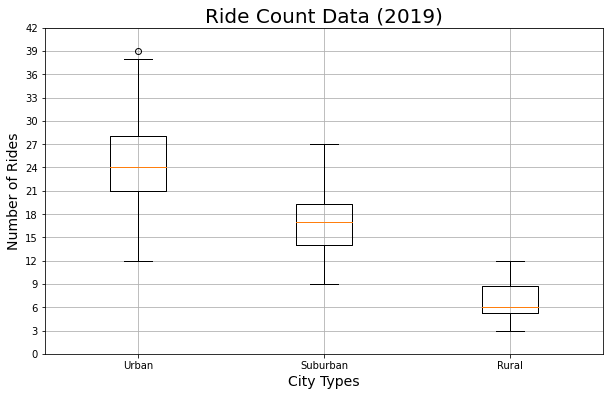

In [29]:
x_labels = ["Urban", "Suburban", "Rural"]
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]


fig, ax = plt.subplots(figsize=(10,6))

ax.boxplot(ride_count_data,labels = x_labels)

ax.set_title("Ride Count Data (2019)", fontsize = 20)
ax.set_ylabel('Number of Rides', fontsize = 14)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_yticks(np.arange(0,45,3.0))
ax.grid(True)

plt.savefig("analysis/Fig2.png", facecolor = "white")


In [50]:
#find city with outlier

print(f"The city with the highest rider count is {urban_ride_count[urban_ride_count==urban_ride_count.max()].index[0]} with {urban_ride_count.max()} riders.")

The city with the highest rider count is West Angela with 39 riders.


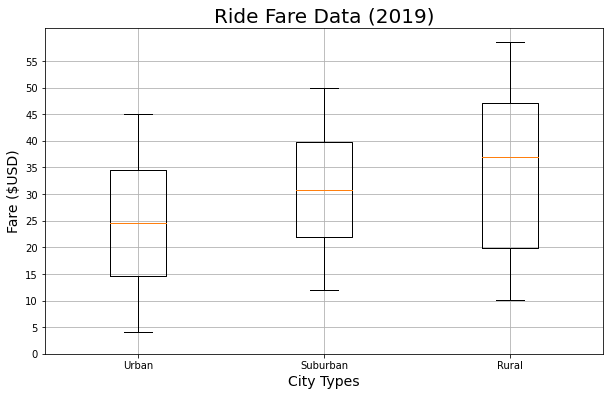

In [54]:
#build fares box and whisker plot
fare_data = [urban_fares,suburban_fares,rural_fares]


#build figure and axis
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(fare_data, labels = x_labels)

#set labels/titles
ax.set_title("Ride Fare Data (2019)", fontsize = 20)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_ylabel("Fare ($USD)", fontsize = 14)
ax.grid(True)

#axis increments
ax.set_yticks(np.arange(0,60,5.0))

plt.savefig("analysis/Fig3.png", facecolor = "white")

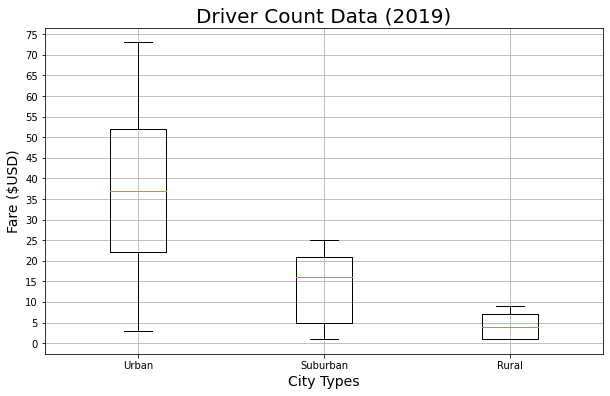

In [55]:
#build drivers box and whisker plot
driver_data = [urban_drivers,suburban_drivers,rural_drivers]


#build figure and axis
fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(driver_data, labels = x_labels)

#set labels/titles
ax.set_title("Driver Count Data (2019)", fontsize = 20)
ax.set_xlabel("City Types", fontsize = 14)
ax.set_ylabel("Fare ($USD)", fontsize = 14)
ax.grid(True)

#axis increments
ax.set_yticks(np.arange(0,80,5.0))

plt.savefig("analysis/Fig4.png", facecolor = "white")

In [62]:
#getting fares pie chart data

sum_fares_by_type = pyber_data_df.groupby(["type"]).sum()["fare"]

sum_fares_by_type.head()

total_fares = pyber_data_df["fare"].sum()


type_percents = 100 * sum_fares_by_type / total_fares

type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

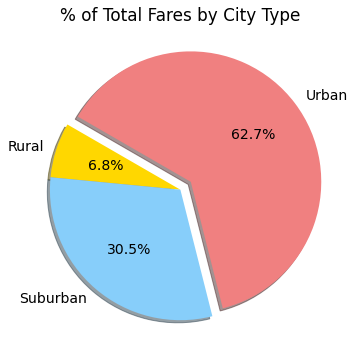

In [75]:
#create fares pie chart

fig, ax = plt.subplots(figsize = (10,6))

ax.pie(type_percents, labels = ["Rural", "Suburban", "Urban"],
      colors = ["gold", "lightskyblue", "lightcoral"],
      explode = [0,0,.1],
      autopct="%1.1f%%",
      shadow = True,
      startangle=150)

ax.set_title("% of Total Fares by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig5.png", facecolor = "white")

In [76]:
#create data for rider pie chart

ride_percents = pyber_data_df.groupby(["type"]).count()["ride_id"] / pyber_data_df.count()["ride_id"] * 100

ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

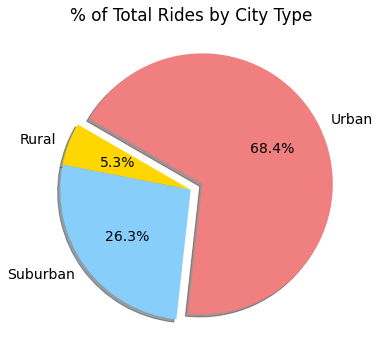

In [78]:
#create fares pie chart

fig, ax = plt.subplots(figsize = (10,6))

ax.pie(ride_percents, labels = ["Rural", "Suburban", "Urban"],
      colors = ["gold", "lightskyblue", "lightcoral"],
      explode = [0,0,.1],
      autopct="%1.1f%%",
      shadow = True,
      startangle=150)

ax.set_title("% of Total Rides by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig6.png", facecolor = "white")

In [80]:
#create data for drivers pie chart

driver_percents = city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df.sum()["driver_count"] * 100

driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

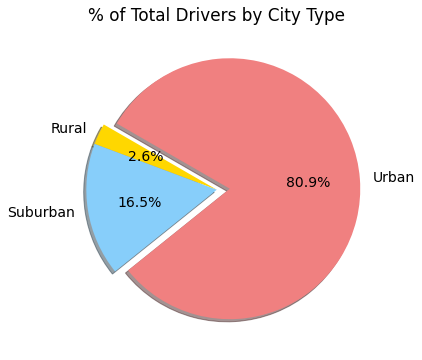

In [81]:
#create drivers pie chart

fig, ax = plt.subplots(figsize = (10,6))

ax.pie(driver_percents, labels = ["Rural", "Suburban", "Urban"],
      colors = ["gold", "lightskyblue", "lightcoral"],
      explode = [0,0,.1],
      autopct="%1.1f%%",
      shadow = True,
      startangle=150)

ax.set_title("% of Total Drivers by City Type")
mpl.rcParams['font.size'] = 14

plt.savefig("analysis/Fig7.png", facecolor = "white")
plt.show()